In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import keyboard
from IPython.display import clear_output
%matplotlib inline 

▣ Dataset directory: w
▣ Sound source Direction: left
Program settings: Quit:'Esc' | Change Direction:'c'


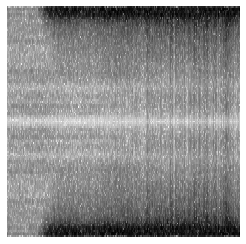

 Image name: 37.png


In [ ]:
img_dir = ''
crnt_direction = ''

RATE = 16000
RECORD_SECONDS = 1
CHUNK = 1024
CHANNELS = 2

DIRECTIONS = ['left','right','front','back']

DIGITAL_PIN = 2
TONE_PIN = 3

# Getting the last saved image name
def get_last(path):
    image_names = [] 
    if not os.listdir(img_dir):
        return 0
    for file in os.listdir(path):
        if file.endswith(".png"):
            file = int(file[:-4])
            image_names.append(file) 
    if len(image_names) == 0: 
        return 0
    else: 
        return max(image_names)

# Setting the directory for saving the images
def set_dataset_path():
    clear_output()
    global img_dir
    exist = False
    while not exist:
        dir_name = input("▢ Set Dataset directory: ")
        if os.path.exists(dir_name):
            img_dir = dir_name
            exist = True
            break
        else:
            print("▶ The directory does not exist!")
            while True:
                consent = input("Do you want to create the directory: '{}'? (y/n)".format(dir_name))
                consent = consent.lower()
                if consent == "y":
                    os.makedirs(dir_name)
                    img_dir = dir_name
                    exist = True
                    break
                elif consent == "n":
                    break
                else:
                    print("▶ Please enter 'y' or 'n'")

# Selecting the recorded direction of the source    
def set_source_direction():
    global crnt_direction
    clear_output()
    while True:
        print("\nDirections:",DIRECTIONS)
        direc = input("▢ Sound source direction: ")
        direc = direc.lower()
        if direc in DIRECTIONS:
            crnt_direction = direc
            break
        print("▶ Please enter a valid direction")

# Converting the recorded audio data into Spetrogram images
def audio2spectro():
    p = pyaudio.PyAudio()
    stream = p.open(format = pyaudio.paInt16,
                    channels = CHANNELS,
                    rate = RATE,
                    input = True,
                    frames_per_buffer = CHUNK)
    frames = []
    for _ in range(int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16))
    data = np.hstack(frames)

    stream.stop_stream()
    stream.close()
    p.terminate()

    plt.figure(figsize=(4.16,4.24))    # figsnize=(4.16,4.24) with (dpi=40) produce a 128x128 image
    plt.specgram(data, Fs=RATE, cmap='Greys')
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
   
    while True:
        if os.path.isdir("{}/{}".format(img_dir,crnt_direction)):
            clear_output()
            notice()
            img_name = get_last("{}/{}".format(img_dir,crnt_direction)) + 1
            plt.savefig('{}/{}/{}.png'.format(img_dir,crnt_direction, img_name), 
                        bbox_inches='tight', 
                        pad_inches=0, 
                        dpi=40)
            plt.show()      
            print(" Image name: {}.png".format(img_name))
            break
        else:
            os.makedirs("{}/{}".format(img_dir,crnt_direction))
        
def notice():
    print("▣ Dataset directory:",img_dir)
    print("▣ Sound source Direction:",crnt_direction)
    print("Program settings: Quit:'Esc' | Change Direction:'c'")     
                
set_dataset_path()
set_source_direction()
clear_output()
notice()           
    
while True:
    if keyboard.is_pressed('Space'):
        audio2spectro()
    if keyboard.is_pressed('Esc'):
        board.shutdown()
        clear_output()
        print("Shuting Down")
        break
    if keyboard.is_pressed('c'):
        set_source_direction()
        clear_output()
        notice()
    